<a href="https://colab.research.google.com/github/vignan8279/Gallivanters/blob/master/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting Data

In [0]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [0]:
from google.colab import files
files.upload()

In [0]:

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c gallivanters

  0% 0.00/74.0 [00:00<?, ?B/s]
100% 74.0/74.0 [00:00<00:00, 62.5kB/s]
 98% 392M/399M [00:08<00:00, 44.0MB/s]
100% 399M/399M [00:08<00:00, 49.1MB/s]
  0% 0.00/1.75k [00:00<?, ?B/s]
100% 1.75k/1.75k [00:00<00:00, 1.53MB/s]
 78% 47.0M/60.4M [00:01<00:01, 13.6MB/s]
100% 60.4M/60.4M [00:02<00:00, 31.4MB/s]
  0% 0.00/82.0 [00:00<?, ?B/s]
100% 82.0/82.0 [00:00<00:00, 82.8kB/s]


In [5]:
!ls

country.zip  sample_data		     SampleSubmission.csv  train.zip
kaggle.json  SampleSubmission%20%283%29.csv  test.zip


In [6]:
from zipfile import ZipFile
file_name = "train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
file_name1 = "test.zip"
with ZipFile(file_name1, 'r') as zip:
  zip.extractall()
  print('Done')
file_name2 = "country.zip"
with ZipFile(file_name2, 'r') as zip:
  zip.extractall()
  print('Done')

Done
Done
Done


In [0]:
!rm -rf test.zip
!rm -rf train.zip
!rm -rf country.zip

#Splitting Data into test and validation and exploring data

In [0]:
import pathlib
from fastai import *
from fastai.vision import *

In [0]:
train_path = "/content/train"

In [13]:
print(os.listdir("/content/train/1"))

['028__1 Cent_australia.jpg', '025__1 Cent_australia.jpg', '029__1 Cent_australia.jpg', '016__1 Cent_australia.jpg', '007__1 Cent_australia.jpg', '001__1 Cent_australia.jpg', '003__1 Cent_australia.jpg', '006__1 Cent_australia.jpg', '012__1 Cent_australia.jpg', '024__1 Cent_australia.jpg', '010__1 Cent_australia.jpg', '018__1 Cent_australia.jpg', '009__1 Cent_australia.jpg', '031__1 Cent_australia.jpg', '013__1 Cent_australia.jpg', '033__1 Cent_australia.jpg', '030__1 Cent_australia.jpg', '023__1 Cent_australia.jpg', '008__1 Cent_australia.jpg', '004__1 Cent_australia.jpg', '034__1 Cent_australia.jpg', '026__1 Cent_australia.jpg', '017__1 Cent_australia.jpg', '020__1 Cent_australia.jpg', '002__1 Cent_australia.jpg', '011__1 Cent_australia.jpg', '015__1 Cent_australia.jpg', '019__1 Cent_australia.jpg', '032__1 Cent_australia.jpg', '014__1 Cent_australia.jpg', '005__1 Cent_australia.jpg']


In [15]:
!pip install split-folders
import split_folders
split_folders.ratio('/content/train', output="/content/newdata", seed=1337, ratio=(.8, .1, .1))

Copying files: 7046 files [00:01, 4236.90 files/s]


In [0]:
!mv /content/newdata/val /content/newdata/valid

In [45]:
print(os.listdir("/content/newdata"))

['models', '.ipynb_checkpoints', 'train', 'test', 'valid']


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path("/content/newdata")

In [63]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), size = 256, bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
112,112,112,112,112
Path: /content/newdata;

Valid: LabelList (661 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
112,112,112,11,11
Path: /content/newdata;

Test: None

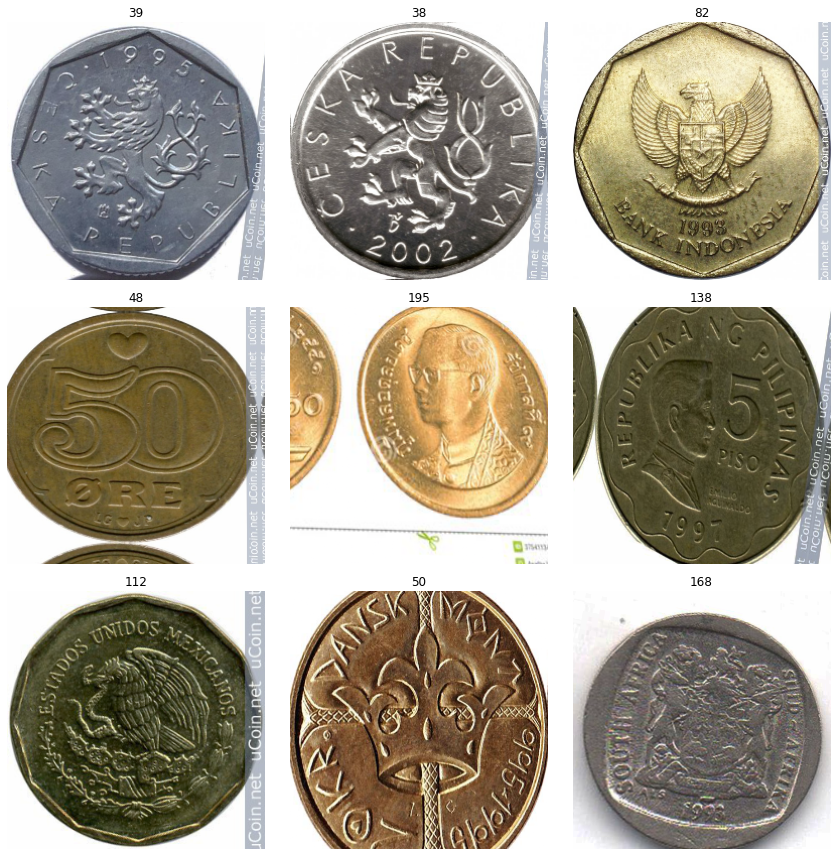

In [64]:
data.show_batch(rows = 3, fig_size = (7, 6))

In [65]:
print(data.classes)
len(data.classes),data.c

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42

(211, 211)

#Fine tuning with ResNet50

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate,callback_fns=ShowGraph)

In [67]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


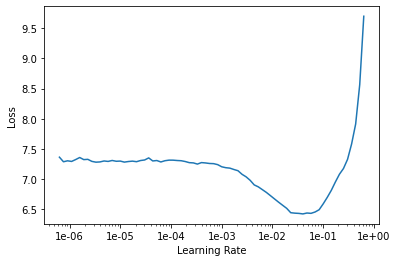

In [68]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,3.463565,1.833820,0.399395,01:29
1,2.383731,1.651004,0.338880,01:30
2,2.181176,1.741050,0.352496,01:29
3,1.556731,1.208274,0.276853,01:28
4,1.180659,0.965330,0.219365,01:29
5,0.881874,0.862108,0.192133,01:28
6,0.609383,0.762296,0.152799,01:27
7,0.391446,0.687305,0.136157,01:28
8,0.259897,0.660948,0.142209,01:27
9,0.220898,0.648960,0.136157,01:27


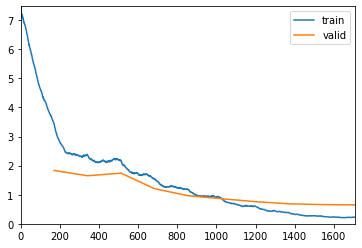

In [69]:
learn.fit_one_cycle(10, max_lr=slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,3.372139,2.061408,0.479576,01:36


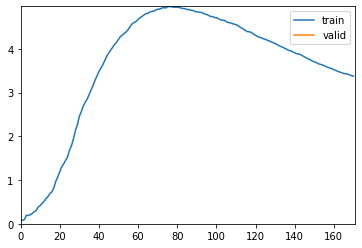

In [70]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-3, 1e-2))

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

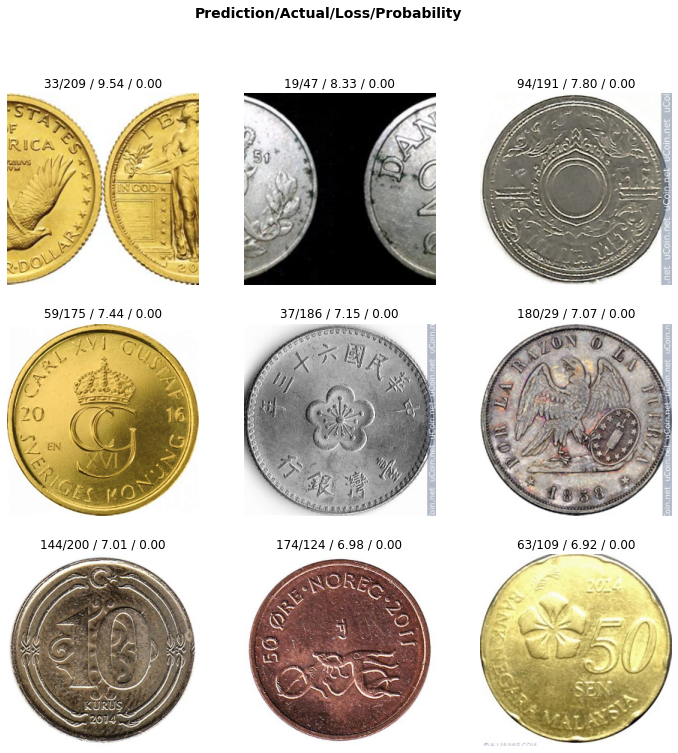

In [73]:
interp.plot_top_losses(9, figsize=(12,12))

In [76]:
interp.most_confused(min_val=2)

[('110', '9', 3),
 ('143', '144', 3),
 ('152', '141', 3),
 ('193', '192', 3),
 ('26', '25', 3),
 ('31', '30', 3),
 ('49', '51', 3),
 ('54', '60', 3),
 ('55', '60', 3),
 ('107', '83', 2),
 ('11', '9', 2),
 ('113', '87', 2),
 ('116', '34', 2),
 ('121', '120', 2),
 ('124', '41', 2),
 ('125', '154', 2),
 ('127', '155', 2),
 ('133', '135', 2),
 ('144', '143', 2),
 ('153', '154', 2),
 ('160', '159', 2),
 ('161', '109', 2),
 ('172', '42', 2),
 ('177', '14', 2),
 ('18', '109', 2),
 ('181', '183', 2),
 ('183', '180', 2),
 ('194', '195', 2),
 ('203', '201', 2),
 ('206', '135', 2),
 ('25', '23', 2),
 ('29', '31', 2),
 ('39', '41', 2),
 ('42', '38', 2),
 ('48', '47', 2),
 ('50', '51', 2),
 ('61', '60', 2),
 ('66', '63', 2),
 ('68', '195', 2),
 ('8', '20', 2),
 ('81', '84', 2),
 ('90', '91', 2),
 ('91', '104', 2),
 ('99', '35', 2)]

In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

#Predicting and loading into csv

In [0]:
c_path = '/content/country.json'
with open(c_path) as json_file:
    tmp = json.load(json_file)
country = {}
for key in tmp.keys():
  country[int(key)] = tmp[key].split(',')[-1]

In [81]:
print(country)

{1: 'australia', 2: 'australia', 3: 'australia', 4: 'australia', 5: 'australia', 6: 'australia', 7: 'australia', 8: 'australia', 9: 'brazil', 10: 'brazil', 11: 'brazil', 12: 'brazil', 13: 'brazil', 14: 'united_kingdom', 15: 'united_kingdom', 16: 'united_kingdom', 17: 'united_kingdom', 18: 'united_kingdom', 19: 'united_kingdom', 20: 'united_kingdom', 21: 'united_kingdom', 22: 'canada', 23: 'canada', 24: 'canada', 25: 'canada', 26: 'canada', 27: 'canada', 28: 'canada', 29: 'chile', 30: 'chile', 31: 'chile', 32: 'chile', 33: 'chile', 34: 'chile', 35: 'china', 36: 'china', 37: 'china', 38: 'czech_republic', 39: 'czech_republic', 40: 'czech_republic', 41: 'czech_republic', 42: 'czech_republic', 43: 'czech_republic', 44: 'czech_republic', 45: 'czech_republic', 46: 'czech_republic', 47: 'denmark', 48: 'denmark', 49: 'denmark', 50: 'denmark', 51: 'denmark', 52: 'denmark', 53: 'denmark', 54: 'spain', 55: 'spain', 56: 'spain', 57: 'spain', 58: 'spain', 59: 'spain', 60: 'spain', 61: 'spain', 62: 

In [0]:
from pathlib import Path
p = Path("/content/test")

In [0]:
directory = p.glob("*.jpg")
output = [0 for i in range(1056)]
for img_path in directory:
    image = open_image(img_path)
    pred_class,pred_idx,outputs = learn.predict(image)
    pred_class = country[int(str(pred_class))]
    output[int(str(img_path).split("/")[-1].split(".")[0])] = pred_class

In [0]:

output = np.array(output,dtype="str")
df = pd.DataFrame(output)
df.to_csv("/content/new_submission.csv")

In [0]:
df.head()

In [119]:
data1 = pd.read_csv("/content/new_submission.csv") 
  
print(data1.columns)

Index(['Unnamed: 0', '0'], dtype='object')


In [0]:
new_data = data1.rename(columns = {"Unnamed: 0": "ID", 
                                  "0":"Country"}) 

In [122]:
print(new_data.columns)

Index(['ID', 'Country'], dtype='object')


In [0]:
data.to_csv("/content/final_submission.csv")

In [124]:
data.columns

Index(['ID', 'Country'], dtype='object')